## **Big Data Final Project**

**Importing the necessary Library**

In [ ]:
pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 121.8/265.6 MB 3.5 MB/s eta 0:00:42
ERROR: Operation cancelled by user


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b327bfff87e851af175eaff2247f13562a791f8d0b3b8c343f224a0887181db5
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
import re
import string
#from emoji import demojize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
#import h2o
#from h2o.automl import H2OAutoML
from pyspark.sql import SparkSession
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import Tokenizer
import tqdm
from pyspark.sql import functions as func
from pyspark.sql.types import StringType,FloatType
#import fasttext

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the Dataset**

In [ ]:
m_cols = ["target","id","date","flag","user","text"]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BIG/02. First Sprint/train_sentiment.csv", names=m_cols , encoding='latin-1')

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Data Preprocessing**

Dropping Unnecessary Columns

In [ ]:
df.drop(columns=["id","date","flag","user"], inplace=True)

Importing a list of stopwords from NLTK's stopwords corpus for the English language because they do not carry significant information

In [ ]:
stop_words = stopwords.words('english')

Initializing a Snowball Stemmer for the English language to reduce the words to their root

In [ ]:
stemmer = SnowballStemmer('english')

Defining special characters in the tweets that are of no significance

In [ ]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+:*()"

Processing Pipeline that does the following:
1. cleans the tweet texts by removing URLs, Usernames, special characters
2. converts all words to lower case
3. removes white spaces
4. tokenization to split each tweet into individual words
5. removes stop words
6. applies stemming


In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
tqdm.tqdm.pandas()

# Apply the preprocess function with a progress bar
df["text"] = df["text"].progress_apply(lambda x: preprocess(x))

100%|██████████| 1600000/1600000 [01:25<00:00, 18727.06it/s]


Preprocessing the Target Variable

In [ ]:
df.loc[df["target"] == 4, "target"] = 1

In [ ]:
df["target"].value_counts()
df.to_csv('preprocessed_data.csv', index=False)

In [ ]:
df[df["target"]==1]

,target,text
800000,1,love health4uandpets u guys r best
800001,1,im meeting one besties tonight cant wait girl ...
800002,1,thanks twitter add sunisa got meet hin show dc...
800003,1,sick really cheap hurts much eat real food plu...
800004,1,effect everyone
...,...,...
1599995,1,woke school best feeling ever
1599996,1,thewdb com cool hear old walt interviews
1599997,1,ready mojo makeover ask details
1599998,1,happy 38th birthday boo alll time tupac amaru ...


## **Visualizations and Exploratory Data Analysis**

In [ ]:
from wordcloud import WordCloud

In [ ]:
df[df["target"]==1]

,target,text
800000,1,1
800001,1,1
800002,1,1
800003,1,1
800004,1,1
...,...,...
1599995,1,1
1599996,1,1
1599997,1,1
1599998,1,1


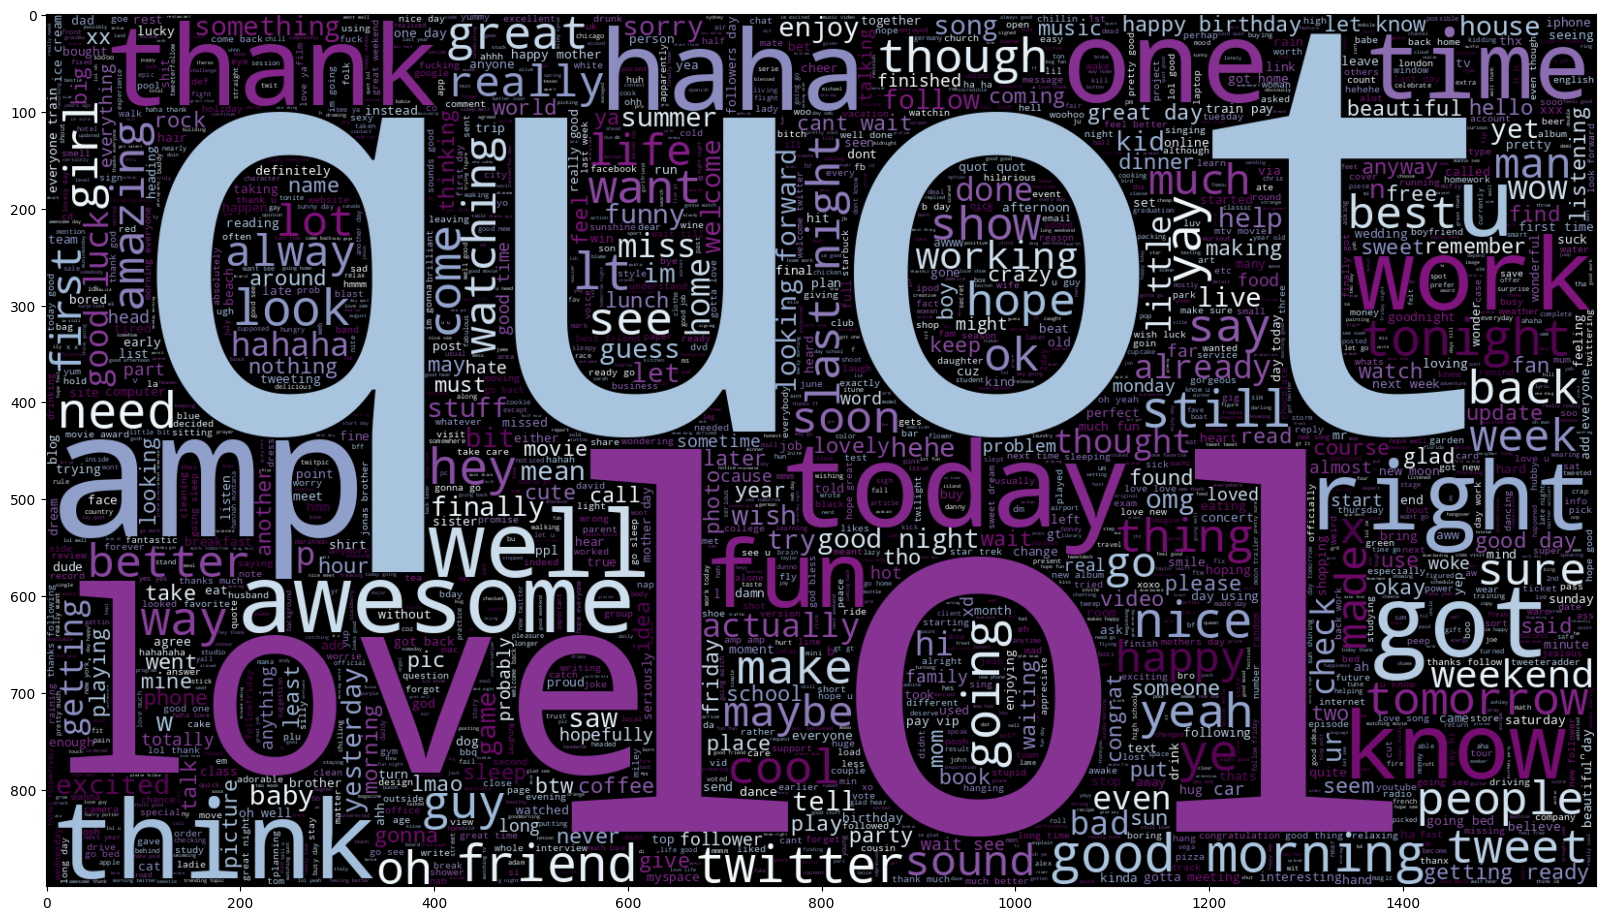

In [ ]:
plt.figure(figsize = (20,16))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 900, colormap='BuPu').generate(" ".join(df[df["target"]==1].text))
plt.imshow(wc , interpolation = 'bilinear')

<ipython-input-47-f46ed487630a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette=colors)


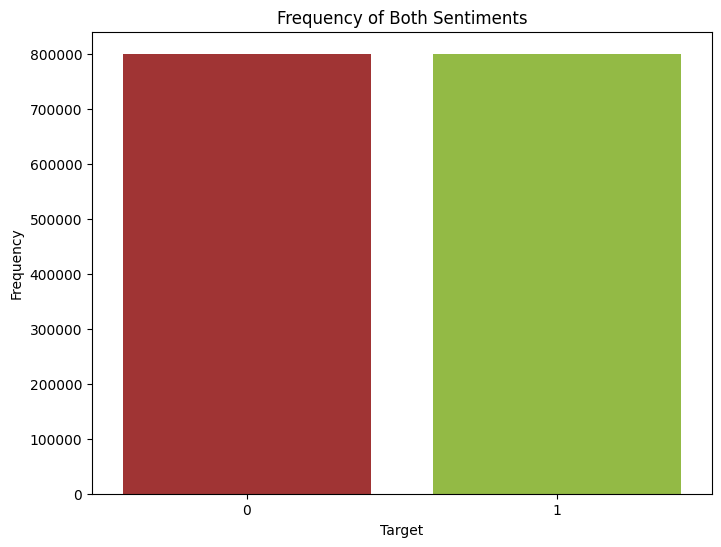

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the "target" column

# Count the occurrences of each value in the "target" column
target_counts = df['target'].value_counts()

# Define the color palette
colors = ['firebrick', 'yellowgreen']  # Example colors, you can choose your own

# Plot the bar plot with specified colors
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=colors)
plt.title('Frequency of Both Sentiments')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'])  # Setting labels for x-axis ticks
plt.show()

## **Initializing a Spark Session**

In [ ]:
data.show()

+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  0|1467810369|Mon Apr 06 22:19:45 PDT 2009|NO_QUERY|_TheSpecialOne_|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|
+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  0|1467810672|        Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|                                                                                               is upset that he ...|
|  0|1467810917|        Mon Apr 06 22:19:...|NO_QUERY|       mattycus|                                                                                               @Kenichan I dived...|
|  0|1467811184|        Mon Apr 06 22:19:...|NO_QUERY|        Ell

## **Feature Extraction**

In [ ]:
# Tokenize the text
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

In [ ]:
data.show()

+------+--------------------+--------------------+
|target|                text|               words|
+------+--------------------+--------------------+
|     0|awww bummer shoul...|[awww, bummer, sh...|
|     0|upset update face...|[upset, update, f...|
|     0|dived many times ...|[dived, many, tim...|
|     0|whole body feels ...|[whole, body, fee...|
|     0|    behaving mad see|[behaving, mad, see]|
|     0|          whole crew|       [whole, crew]|
|     0|            need hug|         [need, hug]|
|     0|hey long time see...|[hey, long, time,...|
|     0|                nope|              [nope]|
|     0|           que muera|        [que, muera]|
|     0|spring break plai...|[spring, break, p...|
|     0|        pierced ears|     [pierced, ears]|
|     0|bear watch though...|[bear, watch, tho...|
|     0|counts idk either...|[counts, idk, eit...|
|     0|would first gun r...|[would, first, gu...|
|     0|wish got watch mi...|[wish, got, watch...|
|     0|hollis death scen...|[h

1. Bag of Words

2. TF-IDF

In [ ]:
from pyspark.ml.feature import HashingTF, IDF

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=10000)
data_tfidf = hashingTF.transform(data)

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(data_tfidf)
data_tfidf = idfModel.transform(data_tfidf)

3. Word Embeddings (Word2Vec)

In [ ]:
from pyspark.ml.feature import Word2Vec

word2vec = Word2Vec(vectorSize=100, minCount=5, inputCol="words", outputCol="features")
model = word2vec.fit(data)
data_we = model.transform(data)

4. N-grams

In [ ]:
from pyspark.ml.feature import NGram

ngram = NGram(n=3, inputCol="words", outputCol="ngrams")
data_ng = ngram.transform(data)

cv = CountVectorizer(inputCol="ngrams", outputCol="features")
model = cv.fit(data_ng)
data_ng = model.transform(data_ng)

### **Data Modeling using H2O**

In [ ]:
h2o.init()

spark = SparkSession.builder \
    .appName("Word2VecExample") \
    .getOrCreate()

data = h2o.import_file("/content/drive/MyDrive/BIG/02. First Sprint/preprocessed_df.csv")

data = data.as_data_frame()
data_spark = spark.createDataFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4bd4l396
  JVM stdout: /tmp/tmp4bd4l396/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4bd4l396/h2o_unknownUser_started_from_python.err


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_j5d75o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data_spark_tokenized = tokenizer.transform(data_spark)

num_epochs = 10

with tqdm.tqdm(total=num_epochs) as pbar:

    word2vec = Word2Vec(vectorSize=100, minCount=5, inputCol="words", outputCol="vectors")

    for epoch in range(num_epochs):
        model = word2vec.fit(data_spark_tokenized)

        pbar.update(1)

model.save("word2vec_model")


word_vectors = model.getVectors()

h2o_vectors = h2o.H2OFrame(word_vectors.toPandas())

h2o.cluster().shutdown()


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
data

+------------+--------------------+
|        word|              vector|
+------------+--------------------+
|    incident|[0.24256308376789...|
|        buns|[-0.0135370539501...|
|     serious|[-0.0667965412139...|
|     comeeee|[0.00161578040570...|
|       brink|[0.05380523949861...|
|        gans|[0.00531453965231...|
|     acronym|[-0.0349017120897...|
|    sinister|[0.00502513162791...|
|      comply|[0.01305403094738...|
|      breaks|[-0.2835757434368...|
|         dns|[0.13784669339656...|
|     sneezed|[0.02165048010647...|
|   forgotten|[-0.0689841061830...|
|      layton|[0.02195317670702...|
|    precious|[0.00695667695254...|
|        leer|[0.00822734180837...|
|       mario|[0.08886305242776...|
|      boxers|[0.06058956310153...|
|  compliment|[7.09987827576696...|
|inflammatory|[0.02905782312154...|
+------------+--------------------+
only showing top 20 rows



In [ ]:
text_column = df['text'].tolist()
preprocessed_df = preprocess_dataset(text_column)

[['target'], ['id'], ['date'], ['flag'], ['user'], ['text']]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Load Word2Vec model (replace 'model_path' with the path to your trained Word2Vec model)
model = Word2Vec.load(model_path)

# Extract word vectors and corresponding words
words = []
vectors = []
for word in model.wv.vocab:
    words.append(word)
    vectors.append(model[word])

# Convert lists to numpy arrays
vectors = np.array(vectors)

# Reduce dimensionality of word vectors using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_embeddings_2d = tsne.fit_transform(vectors)

# Plot word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], alpha=0.5)

# Add annotations for some words
for i, word in enumerate(words):
    plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.grid(True)
plt.show()


# **Logistic Regression using PySpark**

In [ ]:
spark = SparkSession.builder \
    .appName("Logistic Regression with Clean Data") \
    .getOrCreate()

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


In [ ]:
data_path = "/content/drive/MyDrive/BIG/02. First Sprint/train_sentiment.csv"
data = spark.read.csv(data_path, header=False, inferSchema=True)

In [ ]:
data.printSchema()

drop_cols= ("_c1","_c2","_c3","_c4")
df = data.drop(*drop_cols)

#df = df.withColumnRenamed("target", "label")

df.createOrReplaceTempView('temp')
df = spark.sql('SELECT CASE _C0 WHEN 4 THEN 1.0  ELSE 0 END AS label, _c5 FROM temp')
df.show(5, truncate = False)


root
 |-- _c0: integer (nullable = true)
 |-- _c1: long (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)

+-----+-------------------------------------------------------------------------------------------------------------------+
|label|_c5                                                                                                                |
+-----+-------------------------------------------------------------------------------------------------------------------+
|0.0  |@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|
|0.0  |is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!    |
|0.0  |@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds                          |
|0.0  |my whole body feels itchy and like

Preprocessing

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
%%time
clean_text = func.udf(lambda x: preprocess(x), StringType())
df = df.withColumn('text_cleaned',clean_text(func.col("_c5")))

CPU times: user 11.1 ms, sys: 3.3 ms, total: 14.4 ms
Wall time: 248 ms


In [ ]:
df.show()

+-----+--------------------+--------------------+
|label|                 _c5|        text_cleaned|
+-----+--------------------+--------------------+
|  0.0|@switchfoot http:...|awww bummer shoul...|
|  0.0|is upset that he ...|upset update face...|
|  0.0|@Kenichan I dived...|dived many times ...|
|  0.0|my whole body fee...|whole body feels ...|
|  0.0|@nationwideclass ...|    behaving mad see|
|  0.0|@Kwesidei not the...|          whole crew|
|  0.0|         Need a hug |            need hug|
|  0.0|@LOLTrish hey  lo...|hey long time see...|
|  0.0|@Tatiana_K nope t...|                nope|
|  0.0|@twittera que me ...|           que muera|
|  0.0|spring break in p...|spring break plai...|
|  0.0|I just re-pierced...|        pierced ears|
|  0.0|@caregiving I cou...|bear watch though...|
|  0.0|@octolinz16 It it...|counts idk either...|
|  0.0|@smarrison i woul...|would first gun r...|
|  0.0|@iamjazzyfizzle I...|wish got watch mi...|
|  0.0|Hollis' death sce...|hollis death scen...|


In [ ]:
df = df.drop("_c5")

In [ ]:
tokenizer = Tokenizer(inputCol="text_cleaned", outputCol="words_tokens")
words_tokens = tokenizer.transform(df)
words_tokens.show()

+-----+--------------------+--------------------+
|label|        text_cleaned|        words_tokens|
+-----+--------------------+--------------------+
|  0.0|awww bummer shoul...|[awww, bummer, sh...|
|  0.0|upset update face...|[upset, update, f...|
|  0.0|dived many times ...|[dived, many, tim...|
|  0.0|whole body feels ...|[whole, body, fee...|
|  0.0|    behaving mad see|[behaving, mad, see]|
|  0.0|          whole crew|       [whole, crew]|
|  0.0|            need hug|         [need, hug]|
|  0.0|hey long time see...|[hey, long, time,...|
|  0.0|                nope|              [nope]|
|  0.0|           que muera|        [que, muera]|
|  0.0|spring break plai...|[spring, break, p...|
|  0.0|        pierced ears|     [pierced, ears]|
|  0.0|bear watch though...|[bear, watch, tho...|
|  0.0|counts idk either...|[counts, idk, eit...|
|  0.0|would first gun r...|[would, first, gu...|
|  0.0|wish got watch mi...|[wish, got, watch...|
|  0.0|hollis death scen...|[hollis, death, s...|


Feature Extraction

1. Bag of Words

In [ ]:
from pyspark.ml.feature import CountVectorizer

In [ ]:
count = CountVectorizer (inputCol="words_tokens", outputCol="rawFeatures")
model = count.fit(words_tokens)
featurizedData = model.transform(words_tokens)
featurizedData.show()

+-----+--------------------+--------------------+--------------------+
|label|        text_cleaned|        words_tokens|         rawFeatures|
+-----+--------------------+--------------------+--------------------+
|  0.0|awww bummer shoul...|[awww, bummer, sh...|(262144,[1,10,341...|
|  0.0|upset update face...|[upset, update, f...|(262144,[6,67,169...|
|  0.0|dived many times ...|[dived, many, tim...|(262144,[4,209,24...|
|  0.0|whole body feels ...|[whole, body, fee...|(262144,[3,323,37...|
|  0.0|    behaving mad see|[behaving, mad, see]|(262144,[20,482,1...|
|  0.0|          whole crew|       [whole, crew]|(262144,[323,2070...|
|  0.0|            need hug|         [need, hug]|(262144,[33,803],...|
|  0.0|hey long time see...|[hey, long, time,...|(262144,[11,12,20...|
|  0.0|                nope|              [nope]|(262144,[681],[1.0])|
|  0.0|           que muera|        [que, muera]|(262144,[2325,221...|
|  0.0|spring break plai...|[spring, break, p...|(262144,[408,496,...|
|  0.0

2. TF-IDF

In [ ]:
from pyspark.ml.feature import IDF
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [ ]:
hashingTF = HashingTF(inputCol="words_tokens", outputCol="rawFeatures", numFeatures=10000)
data_tfidf = hashingTF.transform(words_tokens)

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(data_tfidf)
data_idf = idfModel.transform(data_tfidf)

data_idf.select("label", "features").show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(10000,[1528,2306...|
|  0.0|(10000,[399,1939,...|
|  0.0|(10000,[1708,2708...|
|  0.0|(10000,[627,841,1...|
|  0.0|(10000,[1616,2007...|
|  0.0|(10000,[627,758],...|
|  0.0|(10000,[5738,6537...|
|  0.0|(10000,[1781,1989...|
|  0.0|(10000,[5234],[6....|
|  0.0|(10000,[4487,9067...|
|  0.0|(10000,[668,1644,...|
|  0.0|(10000,[1089,7477...|
|  0.0|(10000,[55,933,18...|
|  0.0|(10000,[281,4798,...|
|  0.0|(10000,[2911,3385...|
|  0.0|(10000,[366,495,1...|
|  0.0|(10000,[312,1206,...|
|  0.0|(10000,[2294,5108...|
|  0.0|(10000,[2616,3818...|
|  0.0|(10000,[1576,3931...|
+-----+--------------------+
only showing top 20 rows



3. Word Embeddings (Word2Vec)

4. N-Grams

In [ ]:
from pyspark.ml.feature import NGram

ngram = NGram(n=3, inputCol="words_tokens", outputCol="ngrams")
data_ng = ngram.transform(words_tokens)

cv = CountVectorizer(inputCol="ngrams", outputCol="features")
model = cv.fit(data_ng)
data_ng = model.transform(data_ng)

In [ ]:
data_ng.show()

+-----+--------------------+--------------------+--------------------+--------------------+
|label|        text_cleaned|        words_tokens|              ngrams|            features|
+-----+--------------------+--------------------+--------------------+--------------------+
|  0.0|awww bummer shoul...|[awww, bummer, sh...|[awww bummer shou...|      (262144,[],[])|
|  0.0|upset update face...|[upset, update, f...|[upset update fac...|(262144,[175500],...|
|  0.0|dived many times ...|[dived, many, tim...|[dived many times...|      (262144,[],[])|
|  0.0|whole body feels ...|[whole, body, fee...|[whole body feels...|(262144,[49843],[...|
|  0.0|    behaving mad see|[behaving, mad, see]|  [behaving mad see]|      (262144,[],[])|
|  0.0|          whole crew|       [whole, crew]|                  []|      (262144,[],[])|
|  0.0|            need hug|         [need, hug]|                  []|      (262144,[],[])|
|  0.0|hey long time see...|[hey, long, time,...|[hey long time, l...|(262144,[4

In [ ]:
df_final = data_idf.select("label", "features")

In [ ]:
df_final.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(10000,[1528,2306...|
|  0.0|(10000,[399,1939,...|
|  0.0|(10000,[1708,2708...|
|  0.0|(10000,[627,841,1...|
|  0.0|(10000,[1616,2007...|
|  0.0|(10000,[627,758],...|
|  0.0|(10000,[5738,6537...|
|  0.0|(10000,[1781,1989...|
|  0.0|(10000,[5234],[6....|
|  0.0|(10000,[4487,9067...|
|  0.0|(10000,[668,1644,...|
|  0.0|(10000,[1089,7477...|
|  0.0|(10000,[55,933,18...|
|  0.0|(10000,[281,4798,...|
|  0.0|(10000,[2911,3385...|
|  0.0|(10000,[366,495,1...|
|  0.0|(10000,[312,1206,...|
|  0.0|(10000,[2294,5108...|
|  0.0|(10000,[2616,3818...|
|  0.0|(10000,[1576,3931...|
+-----+--------------------+
only showing top 20 rows



# Classical Machine Learning Methods

Train-Validation Split

In [ ]:
trainDF, testDF = df_final.randomSplit([0.8,0.2])

Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the Logistic Regression model
lr = LogisticRegression(labelCol="label", featuresCol="features")

# Train the model
lrModel = lr.fit(trainDF)

# Predict on test data
predictions = lrModel.transform(testDF)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label")

# Evaluate the model and display progress
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = ", accuracy)


Test Accuracy =  0.830620710233257


In [ ]:
pred = predictions.toPandas()
pred.head()

,label,features,rawPrediction,probability,prediction
0,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8279295224092578, -0.8279295224092578]","[0.6959169603254333, 0.30408303967456674]",0.0
1,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.501908554615012, -6.501908554615012]","[0.9985016758104998, 0.0014983241895002442]",0.0
2,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.828173118520154, -1.828173118520154]","[0.8615439493953718, 0.13845605060462818]",0.0
3,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.6981297246056384, -2.6981297246056384]","[0.9369161930242803, 0.06308380697571969]",0.0
4,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.7225118392374723, -1.7225118392374723]","[0.8484520942543413, 0.15154790574565868]",0.0


In [ ]:
y_true = pred['label'].astype('float')
y_pred = pred['prediction']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75    159805
         1.0       0.75      0.78      0.76    160434

    accuracy                           0.76    320239
   macro avg       0.76      0.76      0.76    320239
weighted avg       0.76      0.76      0.76    320239



<Axes: >

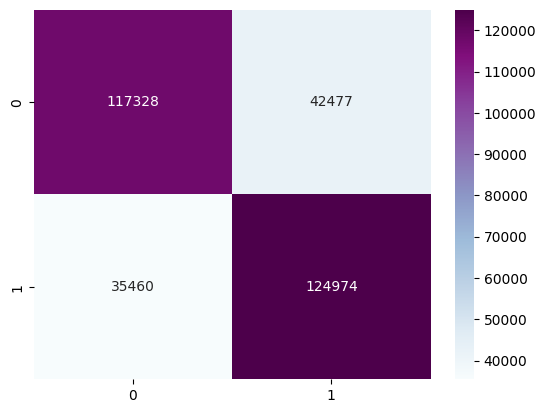

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, fmt=  'd', cmap = 'BuPu')

Naive Bayes

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator

nb = NaiveBayes(featuresCol="features", labelCol="label")

# Train the model
nbModel = nb.fit(trainDF)

# Predict and evaluate the model
predictions_nb = nbModel.transform(testDF)
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy = evaluator.evaluate(predictions_nb)
print("Test Accuracy = ", accuracy)

Test Accuracy =  0.5206848203525801


In [ ]:
pred_nb = predictions_nb.toPandas()
pred_nb.head()

,label,features,rawPrediction,probability,prediction
0,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-478.34994603751477, -483.01337889449474]","[0.9906541478611209, 0.009345852138879025]",0.0
1,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-541.2359326715115, -586.6527193316807]","[1.0, 1.8868621282217502e-20]",0.0
2,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-930.0664857987846, -939.348815949512]","[0.9999069546175441, 9.304538245595585e-05]",0.0
3,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-708.007730961971, -725.7402574793147]","[0.9999999800996107, 1.9900389406450802e-08]",0.0
4,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-438.53953637163465, -447.1516802120132]","[0.9998181495127998, 0.0001818504872002079]",0.0


In [ ]:
y_true_nb = pred_nb['label'].astype('float')
y_pred_nb = pred_nb['prediction']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_nb, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74    159805
         1.0       0.74      0.74      0.74    160434

    accuracy                           0.74    320239
   macro avg       0.74      0.74      0.74    320239
weighted avg       0.74      0.74      0.74    320239



<Axes: >

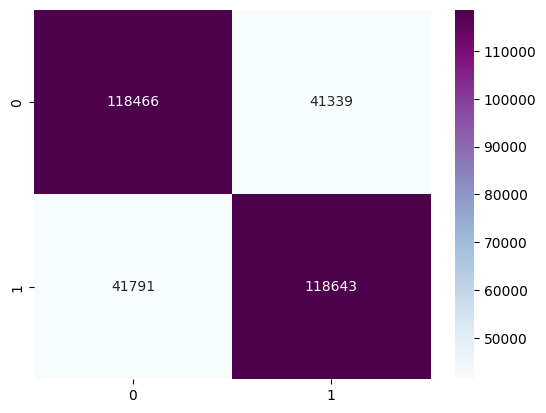

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true_nb, y_pred_nb), annot = True, fmt=  'd', cmap = 'BuPu')

Decision Trees

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

dt = DecisionTreeClassifier(labelCol="label",featuresCol="features")

# Train the model
dtModel = dt.fit(trainDF)

# Predict and evaluate the model
predictions_dt = dtModel.transform(testDF)
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy = evaluator.evaluate(predictions_dt)
print("Test Accuracy = ", accuracy)

Test Accuracy =  0.4825177952844527


In [ ]:
pred_dt = predictions_dt.toPandas()
pred_dt.head()

,label,features,rawPrediction,probability,prediction
0,0.0,"(10.126631728850143, 6.6202300937384635, 0.0, ...","[558019.0, 528083.0]","[0.5137813943810066, 0.48621860561899344]",0.0
1,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[558019.0, 528083.0]","[0.5137813943810066, 0.48621860561899344]",0.0
2,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[558019.0, 528083.0]","[0.5137813943810066, 0.48621860561899344]",0.0
3,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[558019.0, 528083.0]","[0.5137813943810066, 0.48621860561899344]",0.0
4,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[21172.0, 1276.0]","[0.9431575196008554, 0.05684248039914469]",0.0


In [ ]:
y_true_dt = pred_dt['label'].astype('float')
y_pred_dt = pred_dt['prediction']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_dt, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.53      0.94      0.68    159829
         1.0       0.74      0.16      0.27    160474

    accuracy                           0.55    320303
   macro avg       0.64      0.55      0.47    320303
weighted avg       0.64      0.55      0.47    320303



<Axes: >

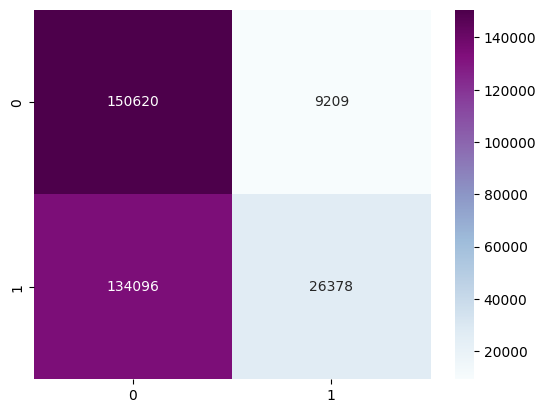

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true_dt, y_pred_dt), annot = True, fmt=  'd', cmap = 'BuPu')

Support Vector Machines

In [ ]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the Linear SVC classifier
svc = LinearSVC(labelCol="label", featuresCol="features")

# Train the model
svc_model = svc.fit(trainDF)

# Predict and evaluate the model
predictions = svc_model.transform(testDF)
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = ", accuracy)


Test Accuracy =  0.8287024711169775


In [ ]:
pred_sv = predictions.toPandas()
pred_sv.head()

,label,features,rawPrediction,prediction
0,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8096066149417704, -0.8096066149417704]",0.0
1,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.8209947574829854, -5.8209947574829854]",0.0
2,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.232517598218806, -1.232517598218806]",0.0
3,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.6026606773229526, -2.6026606773229526]",0.0
4,0.0,"(10.126631728850143, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.612626579776853, -1.612626579776853]",0.0


In [ ]:
y_true_sv = pred_sv['label'].astype('float')
y_pred_sv = pred_sv['prediction']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_sv, y_pred_sv))

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75    159805
         1.0       0.74      0.79      0.76    160434

    accuracy                           0.75    320239
   macro avg       0.76      0.75      0.75    320239
weighted avg       0.76      0.75      0.75    320239



<Axes: >

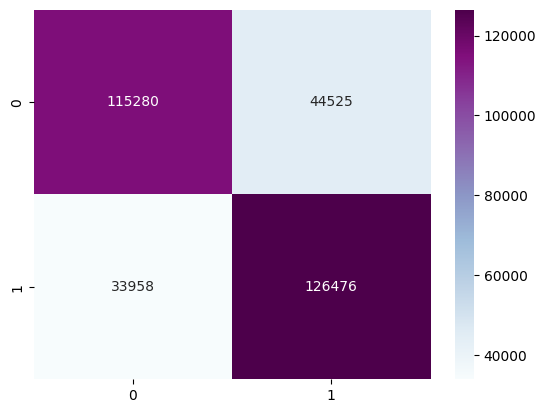

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true_sv, y_pred_sv), annot = True, fmt=  'd', cmap = 'BuPu')

Random Forests

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the Random Forest classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Train the model
rf_model = rf.fit(trainDF)

# Predict and evaluate the model
predictions_rf = rf_model.transform(testDF)
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy = evaluator.evaluate(predictions_rf)
print("Test Accuracy = ", accuracy)


Test Accuracy =  0.6844615827172121


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

# First, you need to convert the predictions to an RDD of (prediction, label) tuples
predictionAndLabels = predictions.select("prediction", "label").rdd.map(lambda p: (float(p.prediction), float(p.label)))

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion Matrix
confusionMatrix = metrics.confusionMatrix().toArray()

# Printing the Confusion Matrix
print("Confusion Matrix:")
print(confusionMatrix)


XGBoost

In [ ]:
from pyspark.ml.classification import GBTClassifier

# Define the XGBoost classifier
xgb = GBTClassifier(featuresCol="features", labelCol="label")

xgb_model = xgb.fit(trainDF)

# Predict and evaluate the model
predictions = xgb_model.transform(testDF)
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = ", accuracy)


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

# First, you need to convert the predictions to an RDD of (prediction, label) tuples
predictionAndLabels = predictions.select("prediction", "label").rdd.map(lambda p: (float(p.prediction), float(p.label)))

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion Matrix
confusionMatrix = metrics.confusionMatrix().toArray()

# Printing the Confusion Matrix
print("Confusion Matrix:")
print(confusionMatrix)


# **Deep Learning Methods**

Multi-layer Perceptrons

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the Multilayer Perceptron classifier
mlp = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features", layers=[10000,16,10, 5, 2])

# Train the model
mlp_model = mlp.fit(trainDF)

# Predict and evaluate the model
pred_mlp = mlp_model.transform(testDF)
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy = evaluator.evaluate(pred_mlp)
print("Test Accuracy = ", accuracy)


ConnectionRefusedError: [Errno 111] Connection refused

# BERT Embedding

BERT Embeddings with Transformers

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, FloatType
import torch
from transformers import BertTokenizer, BertModel,TFBertForSequenceClassification

# Initialize Spark session
spark = SparkSession.builder.appName("BERT Embeddings").getOrCreate()
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

# Define the tokenizer globally (assuming it's less costly to load)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the UDF for generating BERT embeddings
@udf(ArrayType(FloatType()))
def generate_bert_embeddings(text):
    """
    Generate BERT embeddings for a single text entry, initializing the model inside the UDF.
    Handles missing or empty strings by replacing them with a placeholder.
    """
    if text is None or text == '':
        text = "Placeholder text"
    # Initialize the model inside the UDF
    bert_model = BertModel.from_pretrained('bert-base-uncased')
    inputs = tokenizer.encode_plus(text, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    outputs = bert_model(**inputs.to('cuda' if torch.cuda.is_available() else 'cpu'))
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy().flatten().tolist()
    return embeddings

df = spark.read.csv("/content/drive/MyDrive/BIG/02. First Sprint/preprocessed_df.csv", header=True)
df = df.na.drop()

# Apply the UDF to the DataFrame
df2 = df.withColumn("bert_embeddings", generate_bert_embeddings(col("text")))


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


In [ ]:
df2.show()          # Displays the first 20 rows of the DataFrame

+------+--------------------+--------------------+
|target|                text|     bert_embeddings|
+------+--------------------+--------------------+
|     0|awww bummer shoul...|[-0.27098167, -0....|
|     0|upset update face...|[0.1894727, -0.02...|
|     0|dived many times ...|[-0.69841814, -0....|
|     0|whole body feels ...|[-0.18400213, 0.6...|
|     0|    behaving mad see|[-0.11980271, 0.2...|
|     0|          whole crew|[-0.52029544, 0.3...|
|     0|            need hug|[-0.29010412, 0.3...|
|     0|hey long time see...|[0.073535755, 0.2...|
|     0|                nope|[-0.13331763, 0.1...|
|     0|           que muera|[-0.26216266, -0....|
|     0|spring break plai...|[-0.3618883, -0.0...|
|     0|        pierced ears|[-0.14495012, 0.4...|
|     0|bear watch though...|[-0.26547736, 0.0...|
|     0|counts idk either...|[-0.055762257, 0....|
|     0|would first gun r...|[-0.16130768, 0.0...|
|     0|wish got watch mi...|[-0.15834004, -0....|
|     0|hollis death scen...|[-

Data Transfer to H2O and Model Training

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader,RandomSampler
from sklearn.model_selection import train_test_split
import torch

data = pd.read_csv("/content/drive/MyDrive/BIG/02. First Sprint/preprocessed_df.csv")
missing_values = data.isnull().sum()
# Remove rows with missing text data
data_cleaned = data.dropna(subset=['text'])

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization and preparation of dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels  # Ensure this line is correctly defining the labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        target = self.labels[idx]  # This should now work without issue

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(target, dtype=torch.long)  # Ensure this key matches
        }


# Sample a subset of the data for initial setup
data_sample = data_cleaned.sample(n=10000, random_state=42)
texts = data_sample['text'].tolist()
targets = data_sample['target'].tolist()

# Split the data
train_texts, val_texts, train_targets, val_targets = train_test_split(
    texts, targets, test_size=0.1, random_state=42
)

# Create datasets
train_dataset = TextDataset(train_texts, train_targets, tokenizer)
val_dataset = TextDataset(val_texts, val_targets, tokenizer)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


# Load the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)
#with tf.device("/device:GPU:0"):
for batch in train_loader:
  input_ids = batch['input_ids'].to(device)
  attention_mask = batch['attention_mask'].to(device)
  labels = batch['labels'].to(device)  # This key must exactly match what is defined in __getitem__

  optimizer.zero_grad()
  outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
  loss = outputs.loss
  loss.backward()
  optimizer.step()


<ipython-input-5-a187046252a4>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/BIG/02. First Sprint/preprocessed_df.csv")
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use 

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader,RandomSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import torch

data = pd.read_csv("/content/drive/MyDrive/BIG/02. First Sprint/preprocessed_df.csv")
missing_values = data.isnull().sum()
# Remove rows with missing text data
data_cleaned = data.dropna(subset=['text'])

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization and preparation of dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels  # Ensure this line is correctly defining the labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        target = self.labels[idx]  # This should now work without issue

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(target, dtype=torch.long)  # Ensure this key matches
        }

# Function to get subsets of data
def get_data_subset(full_data, chunk_size=1000):
    for start in range(0, len(full_data), chunk_size):
        end = start + chunk_size
        subset = full_data.iloc[start:end]
        texts = subset['text'].tolist()
        targets = subset['target'].tolist()
        yield texts, targets

# Sample a subset of the data for initial setup
data_sample = data_cleaned.sample(n=10000, random_state=42)
texts = data_sample['text'].tolist()
targets = data_sample['target'].tolist()
# Load the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)
# Loop through chunks of data
for texts, targets in get_data_subset(data_cleaned):
    train_texts, val_texts, train_targets, val_targets = train_test_split(
        texts, targets, test_size=0.1, random_state=42
    )
    train_dataset = TextDataset(train_texts, train_targets, tokenizer)
    val_dataset = TextDataset(val_texts, val_targets, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    for batch in train_loader:
      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      labels = batch['labels'].to(device)  # This key must exactly match what is defined in __getitem__

      optimizer.zero_grad()
      outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
      loss = outputs.loss
      loss.backward()
      optimizer.step()


<ipython-input-1-fe9a587607b4>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/BIG/02. First Sprint/preprocessed_df.csv")
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use 

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch

data = pd.read_csv("/content/drive/MyDrive/BIG/02. First Sprint/preprocessed_df.csv")
data_cleaned = data.dropna(subset=['text'])

# Initialize the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        target = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(target, dtype=torch.long)
        }

def get_data_subset(full_data, chunk_size=1000):
    for start in range(0, len(full_data), chunk_size):
        end = start + chunk_size
        subset = full_data.iloc[start:end]
        texts = subset['text'].tolist()
        targets = subset['target'].tolist()
        yield texts, targets

# Load the DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
device = torch.device("cuda" if torch.cuda.is available else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

for texts, targets in get_data_subset(data_cleaned):
    train_texts, val_texts, train_targets, val_targets = train_test_split(
        texts, targets, test_size=0.1, random_state=42
    )
    train_dataset = TextDataset(train_texts, train_targets, tokenizer)
    val_dataset = TextDataset(val_texts, val_targets, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
